<a href="https://colab.research.google.com/github/SergioMoraa/Parcial_2_TAM_Solucion/blob/main/Parte_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bistaumanga/usps-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.75M/2.75M [00:00<00:00, 118MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bistaumanga/usps-dataset/versions/1


# Instalación y carga de datos

In [2]:
# Instalamos UMAP si aún no está
!pip install umap-learn --quiet

# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# Cargar y preparar los datos USPS

In [3]:
# USPS está disponible en OpenML con ID = 41021
usps = fetch_openml('USPS', version=1)
X = usps['data']
y = usps['target'].astype(int)  # Convertimos las etiquetas a enteros

# Escalamos los datos (importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Forma de los datos:", X.shape)


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(


Forma de los datos: (9298, 256)


# Reducción de dimensionalidad con PCA

In [4]:
# Aplicamos PCA a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Mostramos la varianza explicada
print("Varianza explicada por PCA:", pca.explained_variance_ratio_)


Varianza explicada por PCA: [0.21822908 0.10347107]


# Visualización PCA con etiquetas y muestras

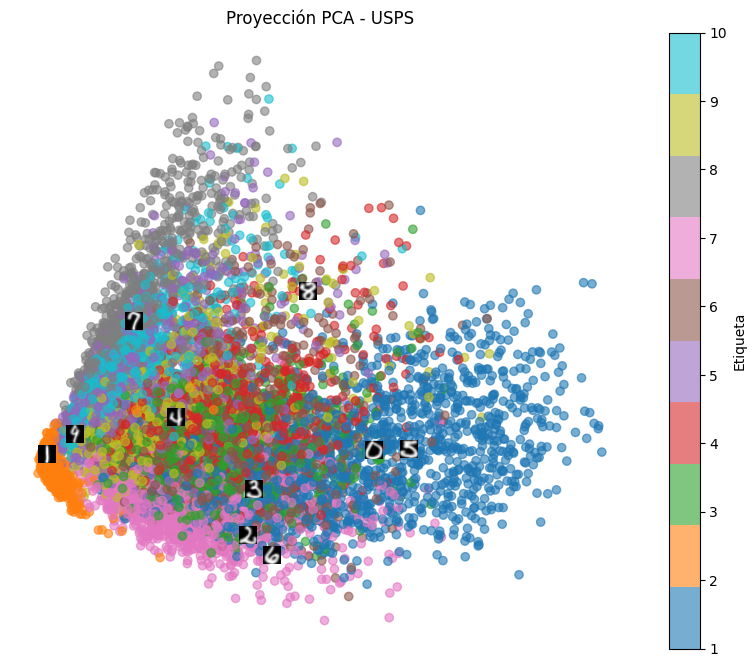

In [5]:
# Función para agregar imágenes al gráfico
def plot_embedding_with_images(X, y, images, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', alpha=0.6)
    ax.set_title(title)
    ax.axis('off')

    # Mostrar 1 imagen por clase
    shown_labels = []
    for i in range(len(X)):
        if y[i] in shown_labels:
            continue
        imagebox = OffsetImage(images[i].reshape(16, 16), zoom=0.8, cmap='gray')
        ab = AnnotationBbox(imagebox, X[i], frameon=False)
        ax.add_artist(ab)
        shown_labels.append(y[i])
    plt.colorbar(scatter, ax=ax, label="Etiqueta")
    plt.show()

# Llamamos a la función para PCA
plot_embedding_with_images(X_pca, y, usps['data'].values, "Proyección PCA - USPS")


# Reducción con UMAP (n_neighbors = 15)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


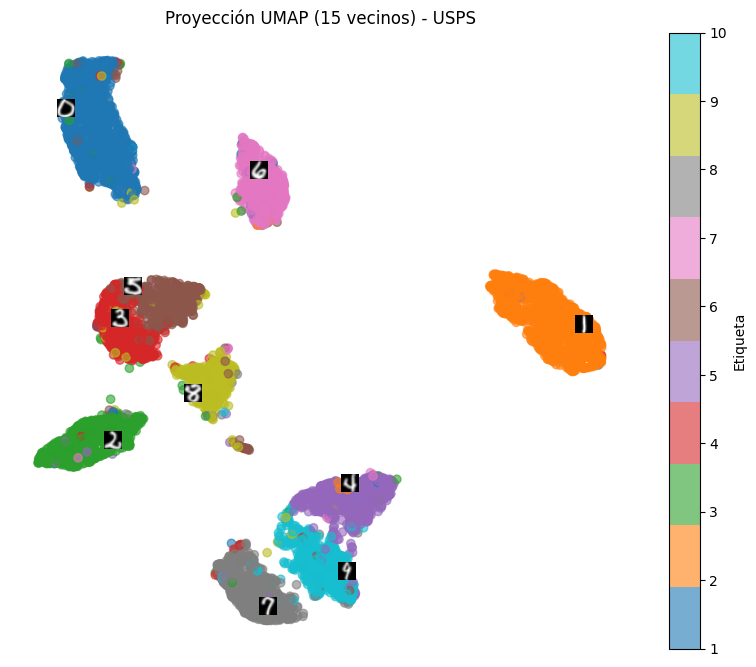

In [6]:
# UMAP con vecinos por defecto (15)
umap_model = umap.UMAP(n_neighbors=15, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plot_embedding_with_images(X_umap, y, usps['data'].values, "Proyección UMAP (15 vecinos) - USPS")


# Comparación con diferentes n_neighbors en UMAP

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


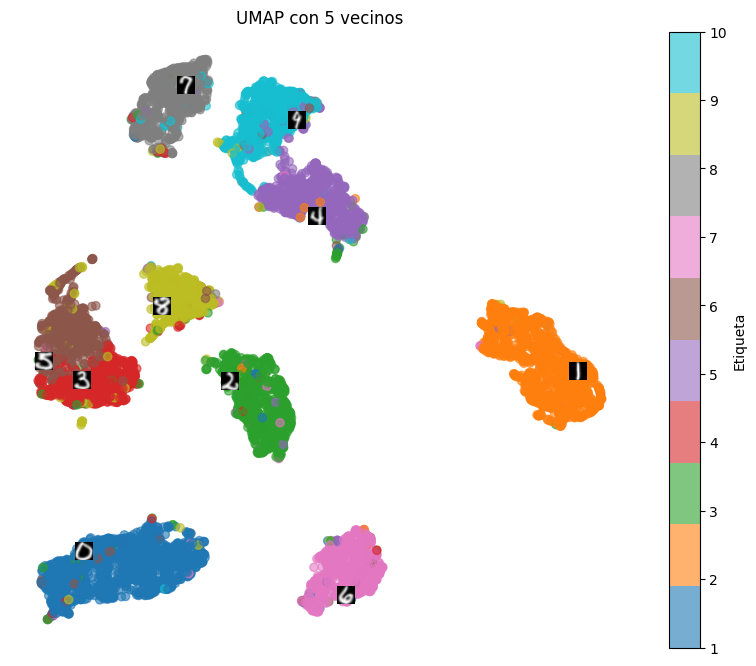

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


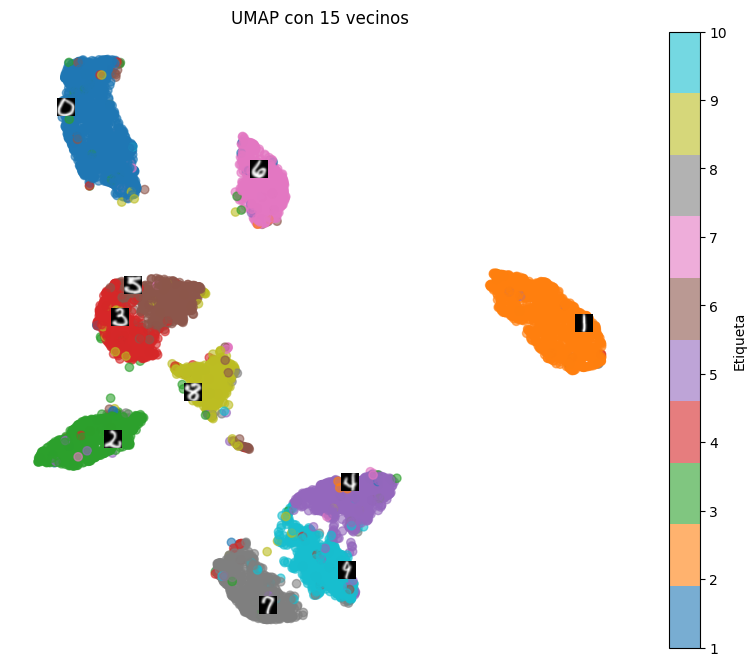

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


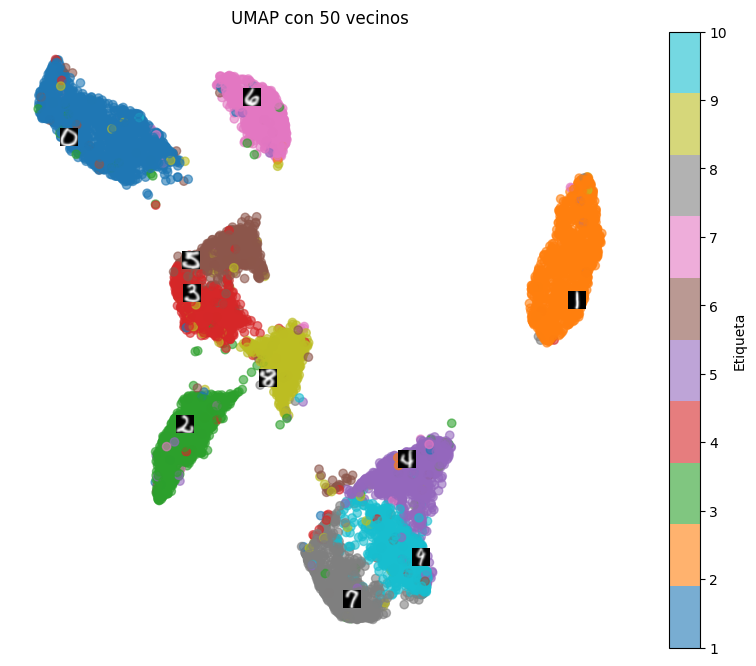

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


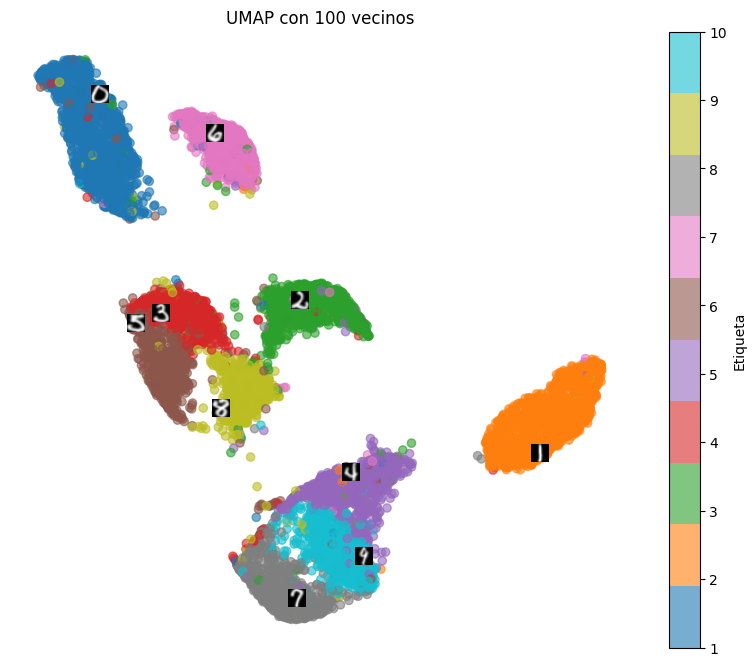

In [7]:
# Probar UMAP con diferente número de vecinos
for n in [5, 15, 50, 100]:
    umap_model = umap.UMAP(n_neighbors=n, random_state=42)
    X_umap_n = umap_model.fit_transform(X_scaled)
    plot_embedding_with_images(X_umap_n, y, usps['data'].values, f"UMAP con {n} vecinos")


# DISCUSIÓN
## Comparación PCA vs UMAP sobre USPS

- **PCA** proyecta los datos en direcciones lineales que maximizan la varianza, resultando en una distribución más difusa y "extendida", especialmente porque no tiene en cuenta las etiquetas ni la estructura no lineal.
- **UMAP** logra una proyección más agrupada por clases, ya que preserva mejor la topología del espacio de alta dimensión.

###  Efecto del número de vecinos (`n_neighbors`) en UMAP:
- **Vecinos pequeños (e.g., 5):** Más separación entre clases, pero posible sobreajuste (clusters muy apretados).
- **Vecinos grandes (e.g., 100):** Mejora la continuidad global del espacio, pero reduce la separación entre clases.

Esto ilustra cómo `n_neighbors` regula el equilibrio entre la estructura **local** y **global** del espacio latente.
